In [1]:
import numpy as np
import matplotlib.pyplot as plt

V_LS = 21.0 # In MeV
DIFFUSIVITY = 0.6 # Diffusivity, may want to check the vaidity of this paticular number
r_0 = 1.2 # In fm, may want to chose a better value for small nuclei
A_C = 10 # The number of nucleons in the core

CENTRAL_POTENTIAL_PARAMETERS = [0.1, 0.151991, 0.231013, 0.351119, 0.53367, 0.811131, 1.23285,
                                1.87382, 2.84804, 4.32876, 6.57933, 10.]

CENTRAL_MIXING_COEFFICIENTS = [0.0558247,0.214443,2.42773,-0.724055,-2.17761,1.02031,0.819031,-0.96538,0.197094,0.3221,-0.296652,0.093208]

SPIN_ORBIT_POTENTIAL_PARAMETERS = [11.1111, 7.22509, 4.69817, 3.05502, 1.98655, 1.29177, 0.839985,
                                   0.546207, 0.355175, 0.230956, 0.150181, 0.0976562]

SPIN_ORBIT_MIXING_COEFFICIENTS = [0.0125374, -0.0512991, 0.148279, -0.274449, 0.257826, 0.258896,
                                  -1.36588, 1.22003, 2.19945, -3.41816, 0.115793, -0.0785824]
orb_ang_momentum = 0

In [2]:
def single_gaussian_potential_function(r, c, β):
    """
    Defines the form of the Gaussian wavefunctions used in the series expansion of the wavefunction in terms of the radius r,
    the orbital angular momentum, l, and a range parameter, α_i.
    Handles odd, even, and l=0 cases sepratley to ensure the normalisation factor is correct.

    Parameters
    ----------
    r : sympy variable
    β : float, parameter characterising the gaussian
    c : float, mixing coefficient determining the gaussian fits

    Returns
    -------
    expression evaluated at r, array like 
    """
    return c * np.exp(-β * (r)**2)

def complete_potential(radius, tot_ang_moment, orb_ang_moment, V_ls=V_LS, diffusivity=DIFFUSIVITY, r_0=r_0, num_core_nucleons=A_C):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    R_0 = r_0 * num_core_nucleons**(1/3)
    centeral_potential_term = V_0 / (np.exp((radius - R_0) / diffusivity) + 1)
    spin_orbit_coupling_term = ((tot_ang_moment * (tot_ang_moment + 1)) / 2) - ((orb_ang_moment * (
        orb_ang_moment + 1)) / 2) - 0.375
    woods_saxon_derivative = np.exp((radius - R_0) / diffusivity) / (diffusivity * radius * (
        np.exp((radius - R_0) / diffusivity) + 1)**2)
    return centeral_potential_term - V_ls * spin_orbit_coupling_term * woods_saxon_derivative

def centeral_woods_saxon_potential(radius, orb_ang_moment, diffusivity=DIFFUSIVITY, r_0=r_0, num_core_nucleons=A_C):
    V_0 = -11.39 * (-1)**orb_ang_moment - 51.13 # Defines V_0 for odd and even l states
    R_0 = r_0 * num_core_nucleons**(1/3)
    return V_0 / (np.exp((radius - R_0) / diffusivity) + 1)

def spin_orbit_potential(radius, tot_ang_moment, orb_ang_moment, V_ls=V_LS, diffusivity=DIFFUSIVITY, r_0=r_0, num_core_nucleons=A_C):
    R_0 = r_0 * num_core_nucleons**(1/3)
    spin_orbit_coupling_term = ((tot_ang_moment * (tot_ang_moment + 1)) / 2) - ((orb_ang_moment * (
        orb_ang_moment + 1)) / 2) - 0.375
    woods_saxon_derivative = -1 / (2 * diffusivity * (1 + np.cosh((radius - R_0) / (diffusivity))))
    return V_ls * spin_orbit_coupling_term * woods_saxon_derivative * 1 / (radius)


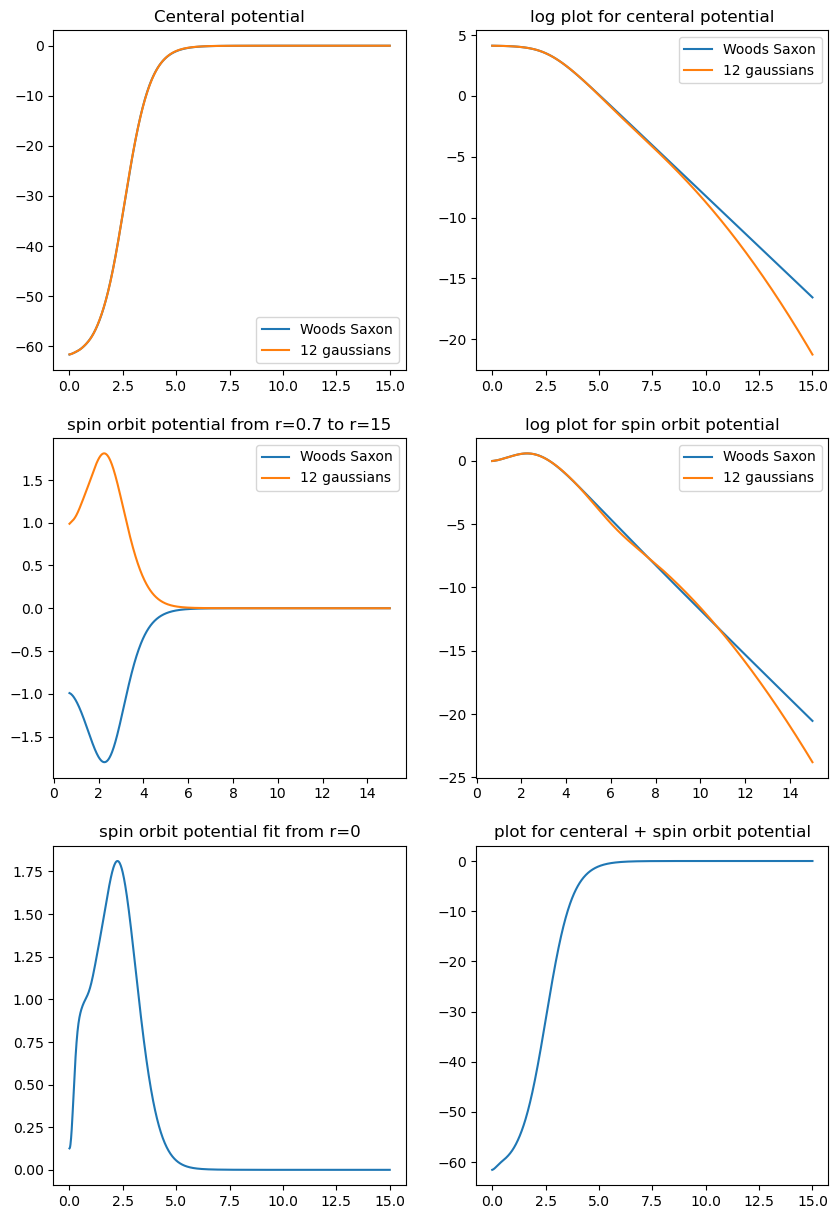

In [3]:
def single_gaussian_potential_function_plot(radius, c, β):
    """
    Defines the form of the Gaussian wavefunctions used in the series expansion of the wavefunction in terms of the radius r,
    the orbital angular momentum, l, and a range parameter, α_i.
    Handles odd, even, and l=0 cases sepratley to ensure the normalisation factor is correct.

    Parameters
    ----------
    r : array like variable
    β : float, parameter characterising the gaussian
    c : float, mixing coefficient determining the gaussian fits

    Returns
    -------
    """
    return c * np.exp(-β * (radius)**2)

def centeral_gaussian_potential_plot(radius, l, mixing_coefficients, betas):
    """
    Defines the spherically symmetric gaussian potential as a function of radius we use as a 'first guess'
    to make our integrals analytic. Given as V = V_0 * e**(-beta * radius**2)

    Parameters
    ----------
    radius : float
    parameters : 1d array containg the fixed parameters for our potential. In the order [V_0, beta] (see slides/supplimentary notes) 

    Returns
    -------
    float with the value of the potential at a radius r

    """
    V_0 = -11.39 * (-1)**l - 51.13 # Defines V_0 for odd and even l states
    gaussian_potential = np.zeros(shape=(1,len(radius)))[0, :]
    for i in enumerate(radius):                             
        for j in enumerate(mixing_coefficients):
            gaussian_potential[i[0]] += single_gaussian_potential_function_plot(radius[i[0]], mixing_coefficients[j[0]], betas[j[0]])
    return V_0 * gaussian_potential

def spin_orbit_gaussian_potential_plot(radius, tot_ang_moment, orb_ang_moment, mixing_coefficients, betas, vls=V_LS):
    """
    Defines the spherically symmetric gaussian potential as a function of radius we use as a 'first guess'
    to make our integrals analytic. Given as V = V_0 * e**(-beta * radius**2)

    Parameters
    ----------
    radius : float
    parameters : 1d array containg the fixed parameters for our potential. In the order [V_0, beta] (see slides/supplimentary notes) 

    Returns
    -------
    float with the value of the potential at a radius r

    """
    spin_orbit_coupling_term = ((tot_ang_moment * (tot_ang_moment + 1)) / 2) - ((orb_ang_moment * (
        orb_ang_moment + 1)) / 2) - 0.375
    gaussian_potential = np.zeros(shape=(1,len(radius)))[0, :]
    for i in enumerate(radius):                             
        for j in enumerate(mixing_coefficients):
            gaussian_potential[i[0]] += (-2) * betas[j[0]] * single_gaussian_potential_function_plot(
                radius[i[0]], mixing_coefficients[j[0]], betas[j[0]])
    return V_LS * spin_orbit_coupling_term * gaussian_potential


fig = plt.figure(figsize=(10,15))
spec = fig.add_gridspec(ncols=2, nrows=3)
ax_1 = fig.add_subplot(spec[0, 0])
ax_2 = fig.add_subplot(spec[0, 1])
ax_3 = fig.add_subplot(spec[1, 0])
ax_4 = fig.add_subplot(spec[1, 1])
ax_5 = fig.add_subplot(spec[2, 0])
ax_6 = fig.add_subplot(spec[2, 1])

X_vals = np.linspace(0, 15, 1000)
X_vals_2 = np.linspace(0.7, 15, 1000)
X_vals_3 = np.linspace(0.5, 15, 1000)

ax_1.plot(X_vals, centeral_woods_saxon_potential(X_vals, orb_ang_momentum), label = 'Woods Saxon')
ax_1.plot(X_vals, centeral_gaussian_potential_plot(X_vals, orb_ang_momentum, CENTRAL_MIXING_COEFFICIENTS, CENTRAL_POTENTIAL_PARAMETERS), label = '12 gaussians')
ax_1.legend()
ax_1.set_title('Centeral potential')

ax_2.plot(X_vals, np.log(np.abs(centeral_woods_saxon_potential(X_vals, orb_ang_momentum))), label = 'Woods Saxon')
ax_2.plot(X_vals, np.log(np.abs(centeral_gaussian_potential_plot(X_vals, orb_ang_momentum, CENTRAL_MIXING_COEFFICIENTS, CENTRAL_POTENTIAL_PARAMETERS))), label = '12 gaussians')
ax_2.set_title('log plot for centeral potential')
ax_2.legend()

ax_3.plot(X_vals_2, spin_orbit_potential(X_vals_2, 1.5, 1), label = 'Woods Saxon')
ax_3.plot(X_vals_2, spin_orbit_gaussian_potential_plot(X_vals_2, 1.5, 1, SPIN_ORBIT_MIXING_COEFFICIENTS, SPIN_ORBIT_POTENTIAL_PARAMETERS), label = '12 gaussians')
ax_3.legend()
ax_3.set_title('spin orbit potential from r=0.7 to r=15')

ax_4.plot(X_vals_2, np.log(np.abs(spin_orbit_potential(X_vals_2, 1.5, 1))), label = 'Woods Saxon')
ax_4.plot(X_vals_2, np.log(np.abs(spin_orbit_gaussian_potential_plot(X_vals_2, 1.5, 1, SPIN_ORBIT_MIXING_COEFFICIENTS, SPIN_ORBIT_POTENTIAL_PARAMETERS))), label = '12 gaussians')
ax_4.set_title('log plot for spin orbit potential')
ax_4.legend()

#ax_5.plot(X_vals, spin_orbit_gaussian_potential_plot(X_vals, 1.5, 1, SPIN_ORBIT_MIXING_COEFFICIENTS, SPIN_ORBIT_POTENTIAL_PARAMETERS))
ax_5.plot(X_vals, spin_orbit_gaussian_potential_plot(X_vals, 1.5, 1, SPIN_ORBIT_MIXING_COEFFICIENTS, SPIN_ORBIT_POTENTIAL_PARAMETERS))
ax_5.set_title('spin orbit potential fit from r=0')
ax_6.plot(X_vals, spin_orbit_gaussian_potential_plot(X_vals, 1.5, 1, SPIN_ORBIT_MIXING_COEFFICIENTS, SPIN_ORBIT_POTENTIAL_PARAMETERS) + centeral_woods_saxon_potential(X_vals, orb_ang_momentum))
ax_6.set_title('plot for centeral + spin orbit potential')

plt.savefig('Potential plots.png')
plt.show()